My first Machine learning project build on my own 

Predicting weight of a fish using the past data 

LINEAR REGRESSION

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Fish.csv")

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


I need to find the importance of a each coloumn in predicting the weight 
so, i need to find correlation to all but the SPECIES column have string values which cannot be calculated 
so, i used LABEL_ENCODER to change string values to int

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lb=LabelEncoder()

In [6]:
df['Species']=lb.fit_transform(df['Species'])

In [7]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [8]:
df.corr()['Weight']

Species   -0.312960
Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Name: Weight, dtype: float64

However, i got species values in -ve. Am going to drop this coloumn

In [9]:
df=df.drop('Species',axis=1)

In [10]:
df

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


Checking if our dataset contains null values

In [11]:
df[df.isnull().any(axis=1)]

,Weight,Length1,Length2,Length3,Height,Width


no null values
but, i used dropna() to drop all null values (mundhu jagratha)

In [12]:
df=df.dropna()

before 159 rows, now also 159 rows because we dont have any null values

In [13]:
df

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [14]:
import seaborn as sns

as we got high corr value for length3 colomn. I just visualised the linear regression line for the two coloumns

C:\Users\sasid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


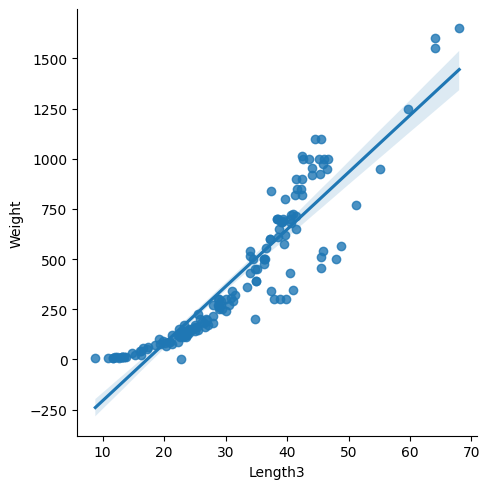

In [15]:
sns.lmplot(x="Length3",y="Weight",data=df,fit_reg=True)

train_test_split is to randomize into random state=42(number is to randomize same every time) our data for splitting into training and testing

In [19]:
from sklearn.model_selection import train_test_split

defining our X and y variables in the equation as whole df expect Weight and only Weight

In [21]:
X=df.drop("Weight",axis=1)
y=df["Weight"]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
print("training data shape",X_train.shape,y_train.shape)
print("testing sata shape",X_test.shape,y_test.shape)

training data shape (127, 5) (127,)
testing sata shape (32, 5) (32,)


In [36]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

training our model with out training data

In [37]:
model.fit(X_train,y_train)

LinearRegression()

predicting weights using our model with our testing data

In [38]:
outputs=model.predict(X_test)

In [40]:
outputs

array([ 266.61925416,  183.03014336,  357.89946728,  794.03051627,
        469.94591383,  842.73715913,  715.73476379,  915.65917287,
        441.29274456,  220.21080416,  473.49696029,  959.5340714 ,
         -1.95264255,  619.5131612 ,  491.59943907,  699.32369949,
        166.96736175, -171.03125545, -213.33048208, -146.89864705,
       -174.10479849,   47.94585802,  194.06333007,  534.74021003,
        556.640954  ,  435.79056497,  667.08562924,  261.61597902,
       -171.86448654,  937.2062092 ,  869.34844964,  598.22814402])

Adding our predicted values to the test data

In [64]:
X_test["Predicted Weights"]=outputs

making all -ve predicted values to 0 and rounding them to avoid decimals

In [66]:
X_test.loc[X_test["Predicted Weights"]<0,"Predicted Weights"]=0
X_test["Predicted Weights"] = X_test["Predicted Weights"].round()


Calculating error b/w predicted values and actual values

In [48]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y_test,X_test["Predicted Weights"])
error

77.978125

In [52]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


mean_absolute_error should always be less than standard deviation of actual values 
here 77<<<<357.978317
Therefore we builded a good model

just to check acyuals and predictions

In [56]:
X_test["Actual Weights"]=y_test

In [67]:
X_test

,Length1,Length2,Length3,Height,Width,Predicted Weights,Actual Weights
99,23.0,25.0,26.5,6.4395,3.6835,267.0,180.0
66,19.0,20.7,23.2,8.5376,3.2944,183.0,140.0
70,23.0,25.0,28.0,11.0880,4.1440,358.0,273.0
29,33.5,37.0,42.6,18.9570,6.6030,794.0,1000.0
130,32.7,35.0,38.8,5.9364,4.3844,470.0,300.0
138,43.2,46.0,48.7,7.7920,4.8700,843.0,567.0
112,34.0,36.5,39.0,10.8810,6.8640,716.0,685.0
33,37.4,41.0,45.9,18.6354,6.7473,916.0,975.0
4,26.5,29.0,34.0,12.4440,5.1340,441.0,430.0
95,21.5,23.5,25.0,6.2750,3.7250,220.0,170.0
